The data set for this exercise is found in the file Baseball Data .  It shows the outcome of the 2016 
Fantasy Baseball League. Your tasks are as follows: 


1.  Import the database as a Pandas dataframe. 

In [148]:
import pandas as pd
df = pd.read_excel('Baseball Data.xlsx')
df

,PLAYER,POS,Team,Games Played,At-bat,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeout,Stolen Bases,Caught Stealing,Batting Average,Slugging Percentage,On-base Percentage,On-base Plus Slugging'
0,"Abreu, Jose",1B,CHW,159.0,624.0,67.0,184.0,32.0,1.0,25.0,100.0,47.0,125.0,0.0,2.0,0.294872,0.469551,0.353957,0.823508
1,"Ackley, Dustin",1B,NYY,28.0,61.0,6.0,9.0,0.0,0.0,0.0,4.0,8.0,9.0,0.0,0.0,0.147541,0.147541,0.242857,0.390398
2,"Adames, Cristhian",SS,COL,121.0,225.0,25.0,49.0,7.0,3.0,2.0,17.0,24.0,47.0,2.0,3.0,0.217778,0.302222,0.304348,0.606570
3,"Adams, Matt",1B,STL,118.0,297.0,37.0,74.0,18.0,0.0,16.0,54.0,25.0,81.0,0.0,1.0,0.249158,0.471380,0.308869,0.780249
4,"Adrianza, Ehire",SS,SF,40.0,63.0,3.0,16.0,2.0,0.0,2.0,7.0,2.0,13.0,0.0,1.0,0.253968,0.380952,0.298507,0.679460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,"Young, Chris",OF,BOS,76.0,203.0,29.0,56.0,18.0,0.0,9.0,24.0,21.0,50.0,4.0,2.0,0.275862,0.497537,0.352423,0.849960
628,"Young, Eric",DH,FA,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000
629,"Zimmerman, Ryan",1B,WSH,115.0,427.0,60.0,93.0,18.0,1.0,15.0,46.0,29.0,104.0,4.0,1.0,0.217799,0.370023,0.271949,0.641972
630,"Zobrist, Ben",2B/OF,CHC,147.0,523.0,94.0,142.0,31.0,3.0,18.0,76.0,96.0,82.0,6.0,4.0,0.271511,0.445507,0.385965,0.831472


a.  Which player had the highest batting average? The lowest? Make sure to print out your results.



In [149]:
# Check if the "batting average" is in the dataframe
check_result = "Batting Average" in df.keys()
print(check_result)

# Player with Highest batting average
idmax = df["Batting Average"].idxmax() 
print("Player has highest batting average:")
print(df.loc[idmax, ["PLAYER"]])
print()
idmin = df["Batting Average"].idxmin()
print("Player has lowest batting average:")
print(df.loc[idmin, ["PLAYER"]])

True
Player has highest batting average:
PLAYER    Perez, Yefri
Name: 436, dtype: object

Player has lowest batting average:
PLAYER    Aguilar, Jesus
Name: 5, dtype: object


b.  Which player had the highest # of home-runs per game? 

In [150]:
idmax = (df["Home Runs"]/df["Games Played"]).idxmax() #return index of the max value
print("Player has highest # of home-runs per game:")
print(df.loc[idmax, ["PLAYER"]])

Player has highest # of home-runs per game:
PLAYER    Mancini, Trey
Name: 336, dtype: object


c.  Do players with higher batting averages tend to score more home runs per game? Create 
a scatter plot and determine if a relationship exists (make sure to include labels!). 

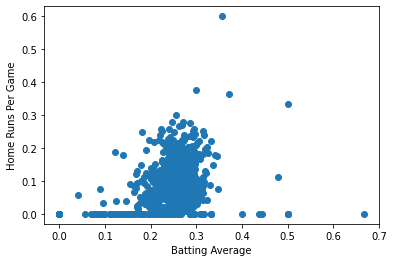

Correlation 0.35615 > 0.3, Moderate correlation
A relationship does exist.


In [151]:
from matplotlib.axis import XAxis
import matplotlib.pyplot as plt

x = df["Batting Average"]
y = df["Home Runs"]/df["Games Played"]

# Save the home runs per game back to the df
df['Home Runs Per Game'] = y

plt.scatter(x, y)
plt.xlabel("Batting Average")
plt.ylabel("Home Runs Per Game")
plt.show()

# Filter out the desired column
filter_names = ["Batting Average", "Home Runs Per Game"] 
df_target = df[filter_names]

# Do corr
corr = df_target["Batting Average"].corr(df_target["Home Runs Per Game"])

print(f"Correlation {corr:.5} > 0.3, Moderate correlation")
 
#corr > 0.2
print("A relationship does exist.")

2.  Create a numpy array of Games Played. 

a.  What is the mean number of games played? The median? 


In [152]:
import numpy as np
df_gameplay = df["Games Played"]
np_gameplay = df_gameplay.to_numpy()
print(f"The mean number of games played: \t{np_gameplay.mean()}")
print(f"The median number of games played: \t{np.median(np_gameplay)}")

The mean number of games played: 	79.43987341772151
The median number of games played: 	78.0


b.  Plot a histogram of this data, choosing an appropriate bin size, and observe the 
distribution. 

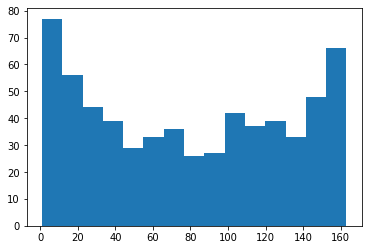

There's a U shape in the distribution data.


In [153]:
plt.hist(np_gameplay,bins=15)
plt.show()
print("There's a U shape in the distribution data.")

3.    Isolate players who play on 1 st  Base, and those who play outfield. 

a.  To which position does the highest home-run scoring player belong to? 


In [154]:
#isolate players who play on 1 st Base
sel_pos_1b = "1B"
filter_1b = df["POS"] == sel_pos_1b
iso_1b = df[filter_1b]
print("Highest home-run scoring player")
print(f"1 st Base:\t {iso_1b['Home Runs'].max()}")
#isolate players who play outfield 
sel_pos_of = "OF"
filter_of = df["POS"] == sel_pos_of
iso_of = df[filter_of]
print(f"Outfield:\t {iso_of['Home Runs'].max()}")
#Result
print("The highest home-run scoring player belong to \"1st Base\" position.")


Highest home-run scoring player
1 st Base:	 41.0
Outfield:	 35.0
The highest home-run scoring player belong to "1st Base" position.


b.  Compare the means and medians of batting averages. Can you conclude that one group 
hits more successfully than the other? 

In [155]:
#1 st Base Mean data
ib_mean = iso_1b['Batting Average'].mean()
print(f"1st Base Mean: \t\t {ib_mean:.5}")
ib_median = iso_1b['Batting Average'].median()
print(f"1st Base Median:\t {ib_median:.5}")
#Outfield data
of_mean = iso_of['Batting Average'].mean()
print(f"Outfield Mean:\t \t {of_mean:.5}")
of_median = iso_of['Batting Average'].median()
print(f"Outfield Median:\t {of_median:.5}")
#Conclude
print("Conclusion: \nBoth mean and median of outfield players batting averages are higher than 1st Base players.")
print("Outfield players hits more successfully than 1st Base players ")


1st Base Mean: 		 0.23503
1st Base Median:	 0.23633
Outfield Mean:	 	 0.23882
Outfield Median:	 0.24308
Conclusion: 
Both mean and median of outfield players batting averages are higher than 1st Base players.
Outfield players hits more successfully than 1st Base players 
